#  Clustering Assignment

## Overview
HELP International is an international humanitarian NGO. We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

## 1. Reading and visualizing the data

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#basics of df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
df.shape

(167, 10)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. Cleaning the Data

In [6]:
#checking the percentage of null values

round(100*(df.isnull().sum()/len(df)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
# changing the percentage columns to normal values so that the data is in same pace

for i in ['exports','health','imports']:
    df[i] =df[i] * df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Performing Univariate Analysis to check the Outliers

In [8]:
l= df.columns
l=l[1:]
l

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

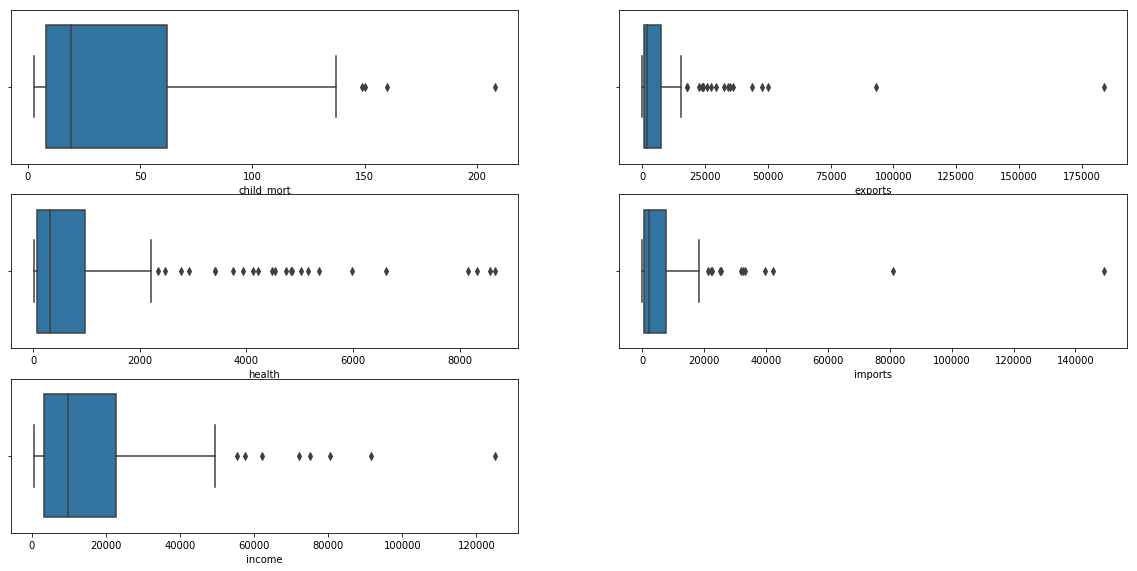

In [9]:
plt.figure(figsize=(20,30))

for i in enumerate(l[0:5]): 
    ax = plt.subplot(9, 2, i[0]+1)
    sns.boxplot(df[i[1]])
plt.show()

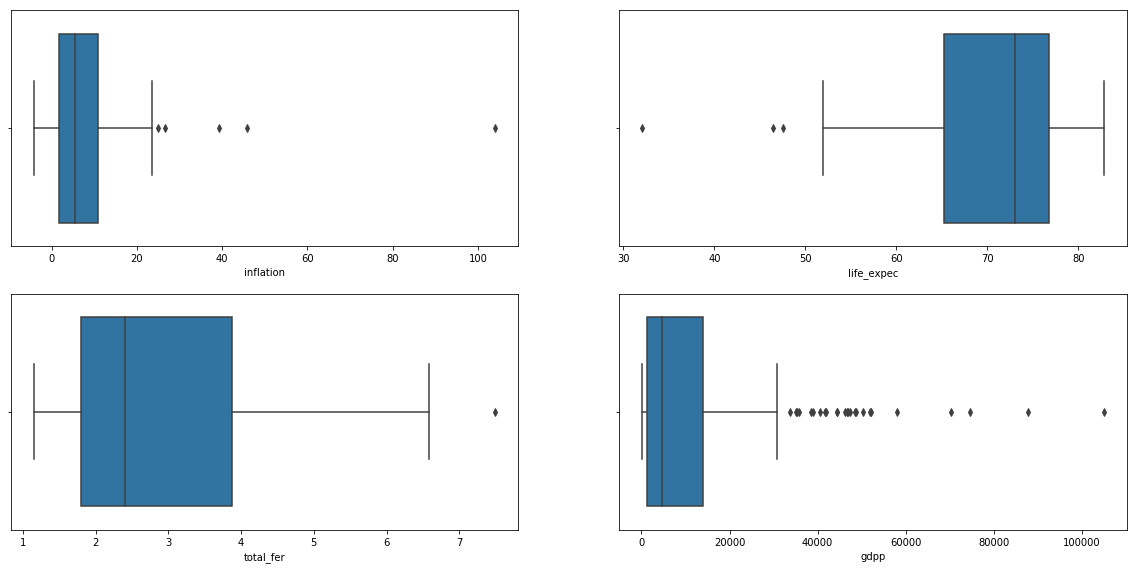

In [10]:
plt.figure(figsize=(20,20))

for i in enumerate(l[5:]): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(df[i[1]])
plt.show()

## Checking the percentiles to cap the outliers

In [11]:
df['child_mort'].describe(percentiles=[.25,.5,.75,.9,.95,.97,.98,.99])

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
90%      100.220000
95%      116.000000
97%      130.140000
98%      145.160000
99%      153.400000
max      208.000000
Name: child_mort, dtype: float64

In [12]:
df['exports'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
90%       17760.600000
95%       31385.100000
99%       64794.260000
max      183750.000000
Name: exports, dtype: float64

In [13]:
df['health'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
90%      3825.416000
95%      4966.701000
99%      8410.330400
max      8663.600000
Name: health, dtype: float64

In [14]:
df['imports'].describe(percentiles=[.25,.5,.75,.9,.95,.99])


count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
90%       15034.280000
95%       24241.560000
99%       55371.390000
max      149100.000000
Name: imports, dtype: float64

In [15]:
df['income'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
90%       41220.000000
95%       48290.000000
99%       84374.000000
max      125000.000000
Name: income, dtype: float64

In [16]:
df['inflation'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
90%       16.640000
95%       20.870000
99%       41.478000
max      104.000000
Name: inflation, dtype: float64

In [17]:
df['gdpp'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
90%       41840.000000
95%       48610.000000
99%       79088.000000
max      105000.000000
Name: gdpp, dtype: float64

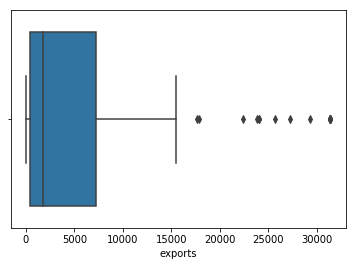

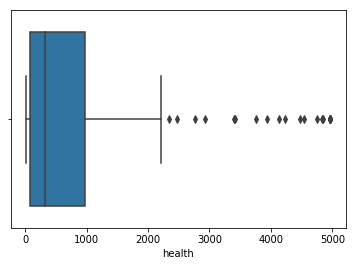

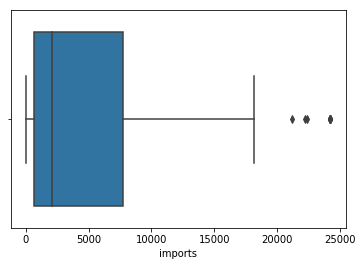

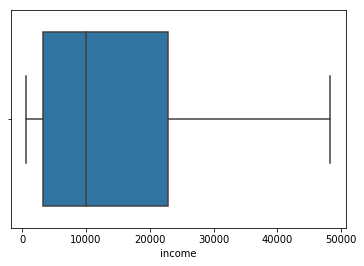

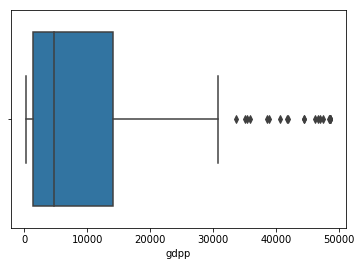

In [18]:
# capping of outliers and doing univariate analysis 

for i in ['exports','health','imports','income','gdpp']:
    Q4 = df[i].quantile(0.95)
    df[i][df[i] >= Q4]=Q4

for i in ['exports','health','imports','income','gdpp']:
    sns.boxplot(df[i])
    plt.show()


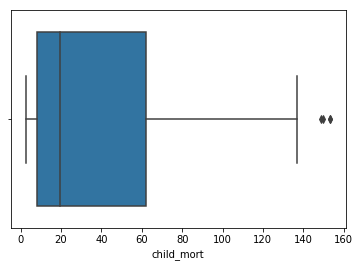

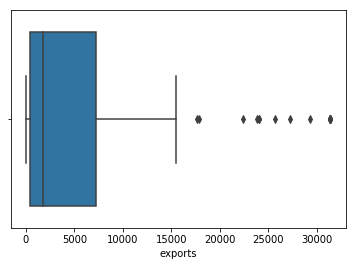

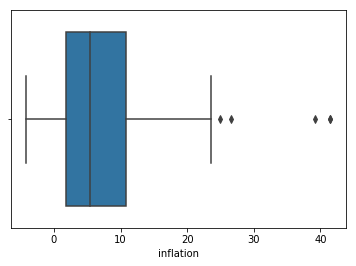

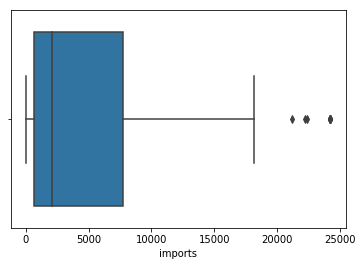

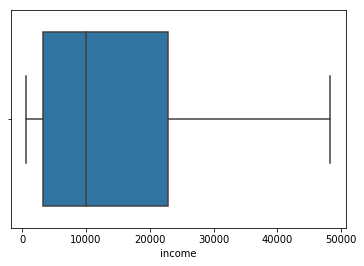

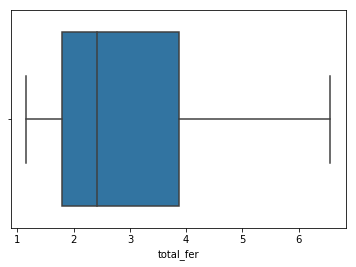

In [19]:
for i in ['child_mort','exports','inflation','imports','income','total_fer']:
    Q4 = df[i].quantile(0.99)
    df[i][df[i] >= Q4]=Q4

for i in ['child_mort','exports','inflation','imports','income','total_fer']:
    sns.boxplot(df[i])
    plt.show()

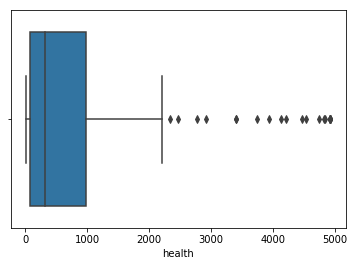

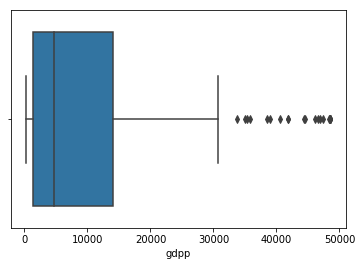

In [20]:
for i in ['health','gdpp']:
    Q4 = df[i].quantile(0.95)
    df[i][df[i] >= Q4]=Q4

for i in ['health','gdpp']:
    sns.boxplot(df[i])
    plt.show()

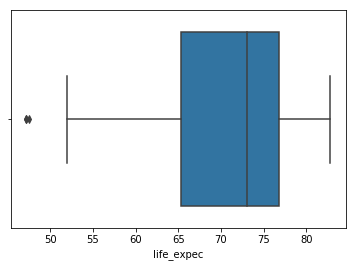

In [21]:
Q4 = df['life_expec'].quantile(0.01)
df['life_expec'][df['life_expec'] <= Q4]=Q4

sns.boxplot(df['life_expec'])
plt.show()

### Outliers treatment is done. We can see still some continuous variables present they are not outliers

## Hopkins check

In [22]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
#Let's check the Hopkins measure
hopkins(df.drop('country', axis = 1))

0.8786347499103282

## Scaling the Data

In [24]:
df1 = df.drop('country',axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [25]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [26]:
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.344006,-0.669581,-0.630411,-0.732729,-0.958349,0.265002,-1.693071,1.926396,-0.757549
1,-0.547497,-0.542172,-0.473895,-0.472182,-0.394006,-0.372075,0.662026,-0.865054,-0.523381
2,-0.272510,-0.475838,-0.530630,-0.560152,-0.192552,1.122161,0.685460,-0.034983,-0.498885
3,2.084159,-0.418960,-0.589763,-0.543087,-0.667360,1.932987,-1.236112,2.153997,-0.560456
4,-0.709406,-0.027134,-0.149914,0.306422,0.227992,-0.764618,0.720610,-0.543736,0.013544


## K Means Clustering

### Finding the optimal number of clusters

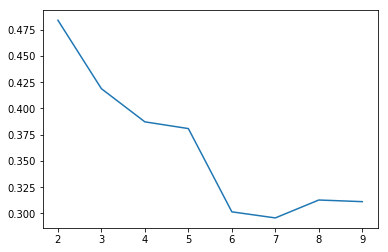

In [27]:
## silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1,kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

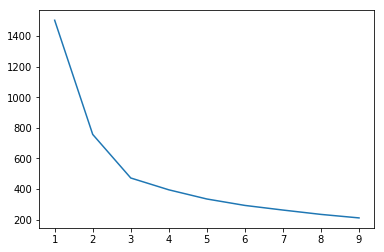

In [28]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

### By looking into silhouette and elbow curve choosing k = 3

In [29]:
# Lets perfom K means using K=3
kmean = KMeans (n_clusters=3, max_iter = 50, random_state=50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [30]:
## Let's make a copy of our original data before using it for analysis
df_org = df.copy()

In [31]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [32]:
col=df.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [33]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [34]:
# Cross check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
clusterID     0
dtype: int64

In [35]:
# checking the count of observations for each cluster

df_km['clusterID'].value_counts()

1    82
2    48
0    37
Name: clusterID, dtype: int64

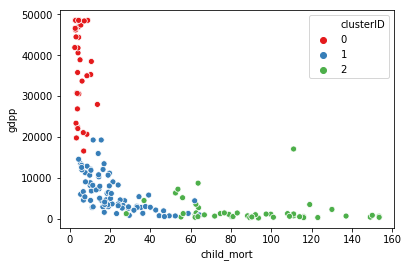

In [36]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = df_km, palette='Set1')

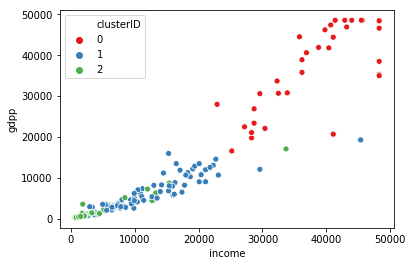

In [37]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = df_km, palette='Set1')

### By choosing K = 4 

In [38]:
kmean1 = KMeans (n_clusters=4, max_iter = 50, random_state=50)
kmean1.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [39]:
df_k = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean1.labels_)], axis = 1)
df_k.columns = ['country','child_mort', 'exports','health', 'imports', 'income', 'inflation','life_expec','total_fer','gdpp','clusterID']
df_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [40]:
# checking the count of observations for each cluster

df_k['clusterID'].value_counts()

2    78
0    48
3    24
1    17
Name: clusterID, dtype: int64

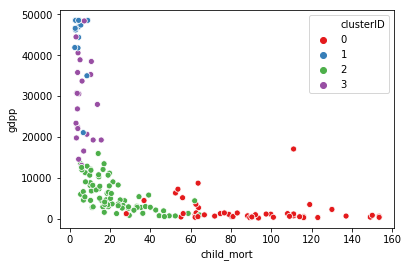

In [41]:
# Plotting the scatter plot using the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clusterID', data = df_k, palette='Set1')

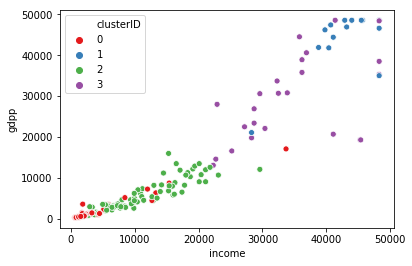

In [42]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clusterID', data = df_k, palette='Set1')

### As we can see when we consider k=4 there is no much dissimilarity or seperation in data. Hence choosing K=3

## Cluster Profiling

In [43]:
# Reading the data frame
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1


In [44]:
# dropping the unncecessary columns and grouping according to clusterId's

df_km.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean()

,child_mort,income,gdpp
clusterID,,,
0,5.237838,38711.081081,37730.351351
1,21.951220,12304.756098,6287.463415
2,90.335417,3897.354167,1909.208333


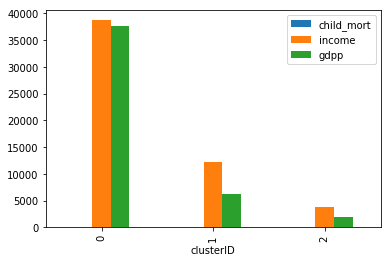

In [45]:
df_km.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('clusterID').mean().plot(kind='bar')

### As we can see cluster 2 has low income and gdpp we need to aid these countries

In [46]:
df_fin=df_km[df_km['clusterID']==2].sort_values(by=["gdpp",'child_mort','income'], ascending=[True, False,  True]) 

In [47]:
df_fin.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348,2
132,Sierra Leone,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482,2


## Hierarchial Clustering 

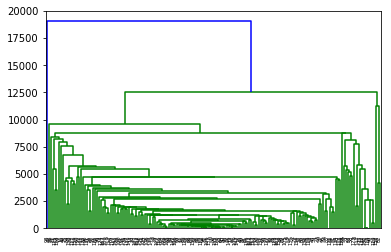

In [48]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

df_km1= df_org.drop('country',axis=1)
# single linkage
mergings = linkage(df_km1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

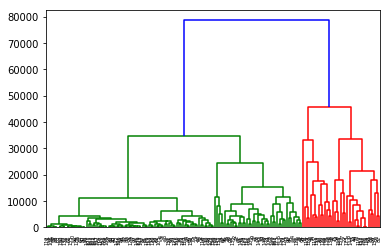

In [49]:
# complete linkage
mergings = linkage(df_km1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Selecting K as 5 using complete linkages

In [50]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 0, 1, 0, 1, 1, 0, 2, 3, 1, 4, 4, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1,
       1, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 4, 4,
       3, 1, 0, 0, 0, 4, 0, 1, 0, 3, 2, 1, 0, 0, 3, 0, 4, 1, 0, 0, 0, 0,
       0, 1, 3, 0, 0, 1, 1, 3, 4, 2, 0, 2, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 4, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       3, 4, 0, 0, 3, 4, 0, 1, 0, 0, 0, 1, 4, 3, 1, 1, 0, 0, 4, 0, 1, 1,
       0, 3, 1, 4, 0, 1, 4, 4, 0, 1, 0, 1, 3, 3, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 2, 2, 1, 0, 0, 1, 0, 0, 0])

In [51]:
# assign cluster labels
df_km1['cluster_labels'] = cluster_labels
df_km1['country']=df_org['country']
df_km1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,Afghanistan
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,Albania
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1,Algeria
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,Angola
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,1,Antigua and Barbuda


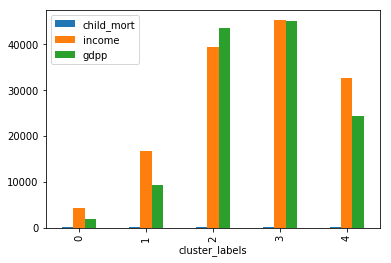

In [52]:
df_km1.drop(['country','exports','health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('cluster_labels').mean().plot(kind='bar')

### Selecting the cluster_label 0 since it has low income and gdpp

In [53]:
df_final=df_km1[df_km1['cluster_labels']==0].sort_values(by=["gdpp",'child_mort', 'income'], ascending=[True, False, True]) 

In [54]:
df_final.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
26,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231,0,Burundi
88,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327,0,Liberia
37,116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334,0,"Congo, Dem. Rep."
112,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348,0,Niger
132,153.4,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399,0,Sierra Leone
93,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413,0,Madagascar
106,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419,0,Mozambique
31,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446,0,Central African Republic
94,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459,0,Malawi
50,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482,0,Eritrea


#### Based on the analysis, below are the top 5 countries that are need of direct aid
    1.Burundi
    2.Liberia
    3.Congo,Dem. Rep.
    4.Niger
    5.Sierra Leone